# 1: A quick use case for MICADO at the ELT


## A brief introduction into using ScopeSim to observe a cluster in the LMC

*This is a step-by-step guide. The complete script can be found at the bottom of this page/notebook.*

First set up all relevant imports:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import scopesim as sim
import scopesim_templates as sim_tp

Scopesim works by using so-called instrument packages, which have to be downloaded separately. For normal use, you would set the package directory (a local folder path, `local_package_folder` in this example), download the required packages *once*, and then **remove the download command**.

In [2]:
local_package_folder = "./inst_pkgs"

However, to be able to run this example on the *Readthedocs* page, we need to include a temporary directory.

**Do not** copy and run this code locally, it is **only** needed to set things up for *Readthedocs*!

In [3]:
from tempfile import TemporaryDirectory
local_package_folder = TemporaryDirectory().name

Download the required instrument packages for an observation with MICADO at the ELT.

Again, you would only need to do this **once**, not every time you run the rest of the script, assuming you set a (permanent) instrument package folder.

In [4]:
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder
sim.download_packages(["Armazones", "ELT", "MAORY", "MICADO"])

['C:\\Users\\ghost\\AppData\\Local\\Temp\\tmpxq_g90il\\Armazones.zip',
 'C:\\Users\\ghost\\AppData\\Local\\Temp\\tmpxq_g90il\\ELT.zip',
 'C:\\Users\\ghost\\AppData\\Local\\Temp\\tmpxq_g90il\\MAORY.zip',
 'C:\\Users\\ghost\\AppData\\Local\\Temp\\tmpxq_g90il\\MICADO.zip']

Now, create a star cluster using the ``scopesim_templates`` package. You can ignore the output that is sometimes printed. The `seed` argument is used to control the random number generation that creates the stars in the cluster. If this number is kept the same, the output will be consistent with each run, otherwise the position and brightness of the stars is randomised every time.

In [5]:
cluster = sim_tp.stellar.clusters.cluster(mass=1000,         # Msun
                                          distance=50000,    # parsec
                                          core_radius=0.3,   # parsec
                                          seed=9002)

Next, make the MICADO optical system model with ``OpticalTrain``. Observe the cluster ``Source`` object with the ``.observe()`` method and read out the MICADO detectors with ``.readout()``. This may take a few moments on slower machines.

The resulting FITS file can either be returned as an ``astropy.fits.HDUList`` object, or saved to disk using the optional ``filename`` parameter

In [6]:
micado = sim.OpticalTrain("MICADO")
micado.observe(cluster)
hdus = micado.readout()
# micado.readout(filename="TEST.fits")

Display the contents the first HDU

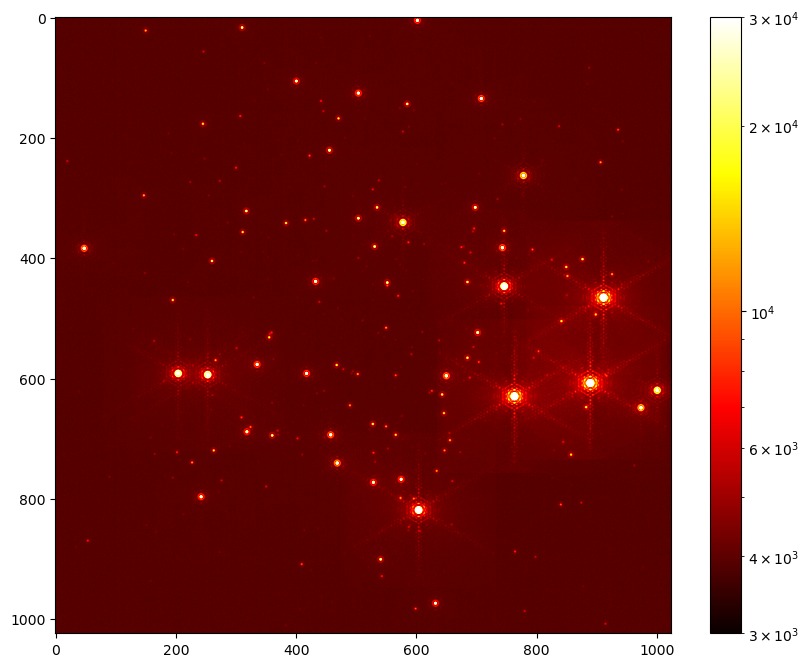

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(hdus[0][1].data, norm=LogNorm(vmax=3E4, vmin=3E3), cmap="hot")
plt.colorbar()

## Complete script

Included below is the complete script for convenience, including the downloads, but not including the plotting.

In [8]:
import scopesim as sim
import scopesim_templates as sim_tp

#sim.download_packages(["Armazones", "ELT", "MAORY", "MICADO"])

cluster = sim_tp.stellar.clusters.cluster(mass=1000,         # Msun
                                          distance=50000,    # parsec
                                          core_radius=0.3,   # parsec
                                          seed=9002)

micado = sim.OpticalTrain("MICADO")
micado.observe(cluster)

hdus = micado.readout()
# micado.readout(filename="TEST.fits")